### 4.1 영화리뷰 분류

In [1]:
# 데이터 로딩
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])


1641221/1641221 [==============================] - 0s 0us/step


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



In [4]:
x_train.shape

(25000, 10000)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [7]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


In [8]:
# 훈련데이터와 검증데이터 분리
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 3s 39ms/step - loss: 0.5204 - accuracy: 0.7857 - val_loss: 0.4102 - val_accuracy: 0.8537
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3119 - accuracy: 0.9027 - val_loss: 0.3123 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2274 - accuracy: 0.9255 - val_loss: 0.2856 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1788 - accuracy: 0.9409 - val_loss: 0.2791 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1434 - accuracy: 0.9549 - val_loss: 0.2799 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1167 - accuracy: 0.9644 - val_loss: 0.2924 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0961 - accuracy: 0.9719 - val_loss: 0.3122 - val_accuracy: 0.8854
Epoch 8/20
30

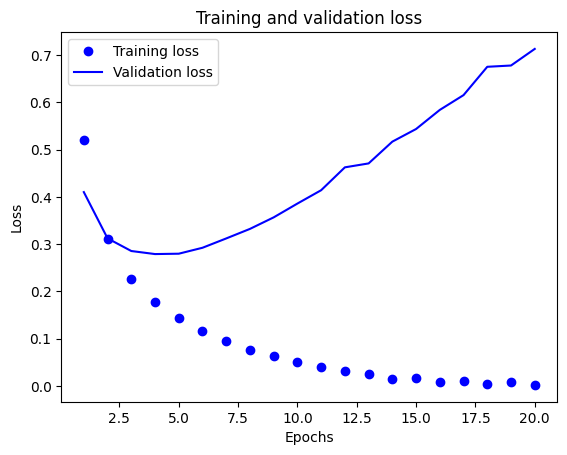

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



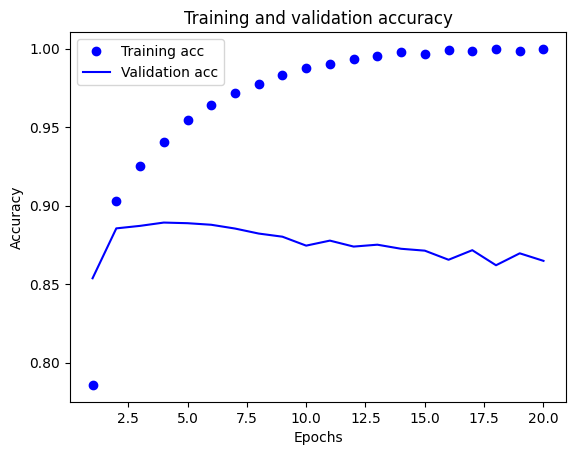

In [11]:

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [12]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4977 - accuracy: 0.8007
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2806 - accuracy: 0.9057
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2109 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2904 - accuracy: 0.8846
